In [1]:
import yfinance as yf
import numpy as np
import pandas as pd



In [2]:
ticker = 'KOTAKBANK.NS'
ohlcv_data = yf.download(ticker,period='5y',interval='1d')
ohlcv_data.dropna(how="any",inplace=True)

df = ohlcv_data.copy()

df['returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
to_plot = ['returns']



[*********************100%***********************]  1 of 1 completed


In [3]:
for m in [3, 5, 10, 14, 21]:
    df['position_%d' % m] = np.sign(df['returns'].rolling(m).mean())
    df['strategy_%d' % m] = (df['position_%d' % m].shift(1) * df['returns'])
    to_plot.append('strategy_%d' % m)


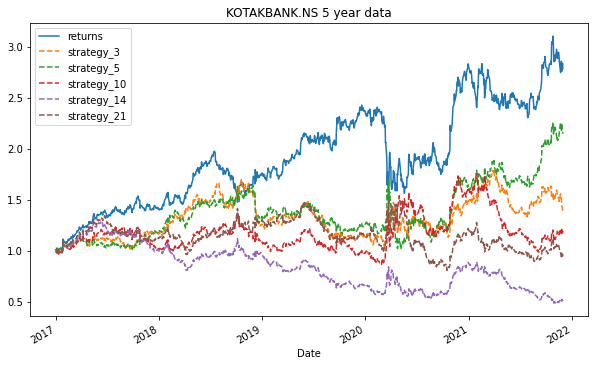

In [4]:

df[to_plot].dropna().cumsum().apply(np.exp).plot(title=ticker+' 5 year data', figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);